<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2020 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

**Temas**  

* Arquitectura Básica de Redes Neuronales. Redes *Feed-Forward*
* Entrenamiento de Redes Neuronales. 
* Redes Convolucionales. 

**Formalidades**  
* Equipos de trabajo de: 3 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Formato de entrega: envı́o de link Github y link de video Youtube o plataforma a convenir, todo esto vía Aula. 

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 8 de Mayo en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 29 de Mayo, horario de clases.
* Fecha de entrega de vídeo: 27 de Mayo (2 días antes de encuentro).
* Fecha de entrega de Jypter (notebook): 27 de Mayo (commits hasta el 29 de Mayo en horario de clases). 
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Pregunta Libre   
[2.](#segundo) Challenge Kaggle


#### <a id="primero"></a>
## 1. Pregunta Libre

Refute o evidencie experimentalmente una de las siguientes afirmaciones 

> **1. Rol de la Profundidad**: Si se toma una arquitectura base cualquiera, $A$, de red neuronal y se añade una capa, $A^{+1}$, siempre se mejorará la tarea objetivo en el conjunto de entrenamiento, validación y pruebas. Eso no depende de la forma de entrenar.

> **2. Teorema de approx. universal**: Una arquitectura de red neuronal tiene la capacidad de aproximar cualquier función y esto es independiente del número de neuronas o capas.

> **3. Rol de la Profundidad**: Si se toma una arquitectura base $A$ con $n$ neuronas y $L$ capas, y se redistribuyen las neuronas aumentando $L$, será posible aprender mejor y más rápido la tarea. 

> **4. Convergencia**: Con la suficiente cantidad de iteraciones, una red neuronal siempre podrá converger algun mínimo local. El tiempo que tarda es independiente de la tasa de aprendizaje y el tamaño de batch.

> **5. Convergencia (2)**: La velocidad de aprendizaje es independiente de la función de activación que se utilice en las capas ocultas y del número de ejemplos de entrenamiento. 

> **6. Approx universal y tolerancia a ruido**: Una red neuronal tiene la capacidad de aprender en el conjunto entrenado, incluso si el *target* (objetivo de la tarea) es aleatorio. Si el porcentaje de etiquetas corruptas  (por ejemplo con un *shift* o *shuffle* sobre $y$) es pequeño, la red aprende la tarea correcta.

> **7. Arquitectura y parámetros de CNN**: Una red convolucional siempre tendrá menor cantidad de parámetros que una red *Feed Forward*, por ende, su desempeño en la tarea estará limitado.

> **8. Ventajas de una CNN**: En cualquier problema que se tenga estructura espacial (uni-dimensional como texto o bi-dimensional como imágenes), una red neuronal con arquitectura convolucional será la más **adecuada** para resolverlo.

> **9. Aplicaciones de una CNN**: No resulta ventajoso aplicar una red con arquitectura convolucional en problemas de regresión. 

> **10. Aplicaciones de una NN**: Las redes neuroanles no se aplican correctamente a problemas multi-label.

> **11. Limitaciones de una NN**: El desbalanceo de las clases no tiene ningún efecto en el entrenamiento de la red.

**Reglas mínimas**: Validar en al menos 1 dataset sintético y 2 reales.



#  Grupo Rastrace
*   Jorge Contreras Cabrera 201573547-6
*   César Quiroz Mansilla 201573578-6




In [0]:
#https://www.kaggle.com/alessiocorrado99/animals10

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Dropout, Input, Activation
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras import backend as K
from keras import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from os import listdir
from os.path import isfile, join, isdir
from PIL import Image
import pandas as pd

Using TensorFlow backend.


In [0]:
#More Metricts
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Dataset 1 CIFAR-10

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [0]:
print('categoria: ', y_train[139])
print(x_train[139])

categoria:  [8]
[[[236 236 236]
  [231 231 231]
  [233 233 233]
  ...
  [219 219 219]
  [219 219 219]
  [221 221 221]]

 [[233 233 233]
  [229 229 229]
  [230 230 230]
  ...
  [216 216 216]
  [215 215 215]
  [218 218 218]]

 [[231 231 231]
  [226 226 226]
  [228 228 228]
  ...
  [215 215 215]
  [215 215 215]
  [216 216 216]]

 ...

 [[113 113 113]
  [112 112 112]
  [101 101 101]
  ...
  [ 83  83  83]
  [ 94  94  94]
  [104 104 104]]

 [[111 111 111]
  [106 106 106]
  [ 95  95  95]
  ...
  [ 99  99  99]
  [104 104 104]
  [115 115 115]]

 [[108 108 108]
  [ 95  95  95]
  [ 87  87  87]
  ...
  [ 94  94  94]
  [ 97  97  97]
  [114 114 114]]]


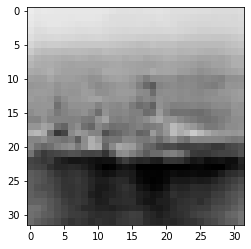

In [0]:
#Example image 32x32
plt.imshow(x_train[139])
plt.show()

In [0]:
#Normalize image
x_train = x_train/255
x_test = x_test/255

In [0]:
# Transform category in vector
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

### Red Convolucional

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32,32,3)))
#32-5+1 = 28
# (28,28,32)
model.add(MaxPooling2D(pool_size=(2, 2)))
# (14,14,32)
model.add(Conv2D(64, (3, 3), activation='relu'))
#14-3+1
# (12,12,64)
model.add(MaxPooling2D(pool_size=(2, 2)))
# (6,6,64)
model.add(Flatten())
#6*6*64 = 2304
model.add(Dense(1000, activation='relu'))
#1000
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
#500
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
#250
model.add(Dense(10, activation='softmax'))
#10

In [0]:
from keras import callbacks
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])

#Computes the crossentropy metric between the labels and predictions.


In [0]:
hist_cnn = model.fit(x_train, y_train_one_hot, 
           batch_size=128, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 85us/step - loss: 0.2190 - accuracy: 0.9256 - f1_m: 0.9258 - precision_m: 0.9370 - recall_m: 0.9150 - val_loss: 1.1549 - val_accuracy: 0.7079 - val_f1_m: 0.7108 - val_precision_m: 0.7380 - val_recall_m: 0.6859
Epoch 2/10
40000/40000 [==============================] - 3s 78us/step - loss: 0.2010 - accuracy: 0.9324 - f1_m: 0.9325 - precision_m: 0.9425 - recall_m: 0.9227 - val_loss: 1.1279 - val_accuracy: 0.7144 - val_f1_m: 0.7173 - val_precision_m: 0.7429 - val_recall_m: 0.6936
Epoch 3/10
40000/40000 [==============================] - 3s 77us/step - loss: 0.1950 - accuracy: 0.9355 - f1_m: 0.9352 - precision_m: 0.9445 - recall_m: 0.9261 - val_loss: 1.2163 - val_accuracy: 0.7102 - val_f1_m: 0.7118 - val_precision_m: 0.7323 - val_recall_m: 0.6925
Epoch 4/10
40000/40000 [==============================] - 3s 76us/step - loss: 0.1827 - accuracy: 0.9381 - f1_m: 0.9385 - precision_m: 0.

In [0]:
result_cnn = model.evaluate(x_test, y_test_one_hot)

10000/10000 [==============================] - 1s 104us/step


### Red Feed Forward

In [0]:
x_train_ff = np.asarray([x.ravel() for x in x_train])
x_test_ff = np.asarray([x.ravel() for x in x_test])

In [0]:
x_train_ff.shape

(50000, 3072)

In [0]:
model_ff = Sequential()
model_ff.add(Dense(2300, activation='relu'))
model_ff.add(Dropout(0.5))
model_ff.add(Dense(1000, activation='relu'))
model_ff.add(Dropout(0.5))
model_ff.add(Dense(500, activation='relu'))
model_ff.add(Dropout(0.5))
model_ff.add(Dense(250, activation='relu'))
model_ff.add(Dropout(0.5))
model_ff.add(Dense(10, activation='softmax'))

In [0]:
model_ff.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [0]:
hist_ff = model_ff.fit(x_train_ff, y_train_one_hot, 
           batch_size=128, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 80us/step - loss: 2.2838 - accuracy: 0.1450 - f1_m: 0.0050 - precision_m: 0.1100 - recall_m: 0.0029 - val_loss: 2.0887 - val_accuracy: 0.2239 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
40000/40000 [==============================] - 3s 74us/step - loss: 2.1108 - accuracy: 0.1833 - f1_m: 0.0116 - precision_m: 0.3343 - recall_m: 0.0059 - val_loss: 2.0659 - val_accuracy: 0.2174 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/10
40000/40000 [==============================] - 3s 75us/step - loss: 2.0805 - accuracy: 0.1931 - f1_m: 0.0148 - precision_m: 0.3748 - recall_m: 0.0076 - val_loss: 2.0361 - val_accuracy: 0.2305 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/10
40000/40000 [==============================] - 3s 74us/step - loss: 2.0457 - accuracy: 0.2

In [0]:
result_ff = model_ff.evaluate(x_test_ff, y_test_one_hot)

10000/10000 [==============================] - 1s 86us/step


In [0]:
print('Results')
print ('-----------------')
print('Accuracy   -> Cnn:', result_cnn[1], 'Ff', result_ff[1])
print('Fscore     -> Cnn:', result_cnn[2], 'Ff', result_ff[2])
print('Precision  -> Cnn:', result_cnn[3], 'Ff', result_ff[3])
print('Recall     -> Cnn:', result_cnn[4], 'Ff', result_ff[4])
print('-------------------')

Results
-----------------
Accuracy   -> Cnn: 0.699400007724762 Ff 0.2784000039100647
Fscore     -> Cnn: 0.7022258043289185 Ff 0.001161777414381504
Precision  -> Cnn: 0.7239453792572021 Ff 0.01916932687163353
Recall     -> Cnn: 0.6824081540107727 Ff 0.0005990415229462087
-------------------


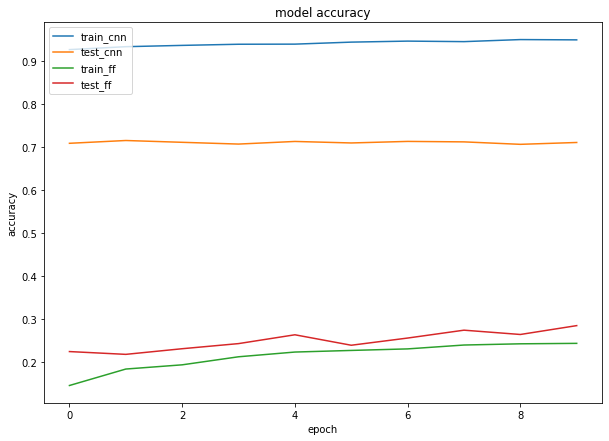

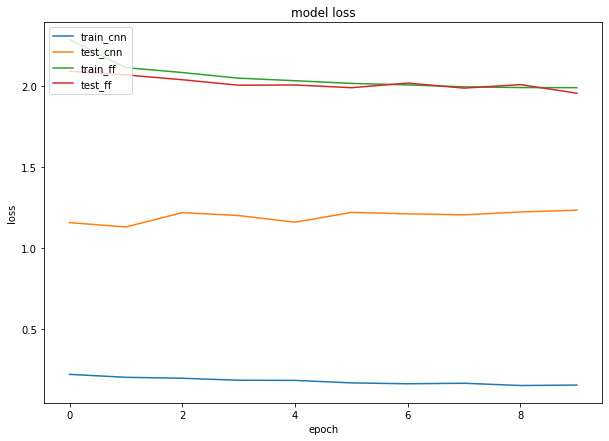

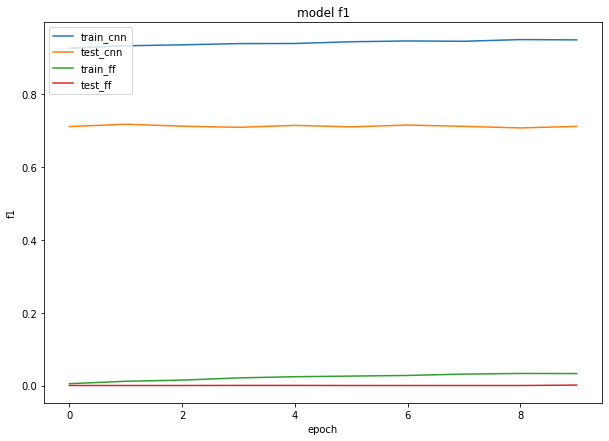

In [0]:
plt.figure(figsize=(10,7))
plt.plot(hist_cnn.history['accuracy'])
plt.plot(hist_cnn.history['val_accuracy'])
plt.plot(hist_ff.history['accuracy'])
plt.plot(hist_ff.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_cnn', 'test_cnn','train_ff', 'test_ff'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(hist_cnn.history['loss'])
plt.plot(hist_cnn.history['val_loss'])
plt.plot(hist_ff.history['loss'])
plt.plot(hist_ff.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_cnn', 'test_cnn','train_ff', 'test_ff'], loc='upper left')
plt.show()
# summarize history for fscore
plt.figure(figsize=(10,7))
plt.plot(hist_cnn.history['f1_m'])
plt.plot(hist_cnn.history['val_f1_m'])
plt.plot(hist_ff.history['f1_m'])
plt.plot(hist_ff.history['val_f1_m'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train_cnn', 'test_cnn','train_ff', 'test_ff'], loc='upper left')
plt.show()

# Dataset 2 IMDB

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (25000,)
y_train shape: (25000,)
x_test shape: (25000,)
y_test shape: (25000,)


In [0]:
max_ = [len(x) for x in x_train]
max_ = max(max_)
max_

2494

In [0]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=max_)
x_test = sequence.pad_sequences(x_test, maxlen=max_)

## Red Feed Forward

In [0]:
model_cuerpo = Sequential()
model_cuerpo.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model_cuerpo.add(Dropout(0.5))
model_cuerpo.add(Dense(10, activation='relu'))
model_cuerpo.add(Dropout(0.5))
model_cuerpo.add(Dense(1, activation='sigmoid'))

In [0]:
model_cuerpo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m])

hist_ff = model_cuerpo.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 2s 67us/step - loss: 0.6932 - accuracy: 0.4980 - f1_m: 0.3795 - precision_m: 0.2848 - recall_m: 0.5714 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_f1_m: 0.6657 - val_precision_m: 0.5003 - val_recall_m: 1.0000
Epoch 2/5
25000/25000 [==============================] - 1s 60us/step - loss: 0.6932 - accuracy: 0.5013 - f1_m: 0.6424 - precision_m: 0.4828 - recall_m: 0.9643 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/5
25000/25000 [==============================] - 1s 60us/step - loss: 0.6932 - accuracy: 0.4984 - f1_m: 0.0163 - precision_m: 0.0120 - recall_m: 0.0255 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/5
25000/25000 [==============================] - 1s 60us/step - loss: 0.6932 - accuracy: 0.5010 - f1_m: 0.58

In [0]:
r_ff = model_cuerpo.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 68us/step


## Red Convolucional

In [0]:
embedding_dim=200

In [0]:
from keras.layers import Conv1D, GlobalMaxPooling1D, Embedding

model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length=max_))
# (924,200)
model.add(Conv1D(256, 5, activation='relu'))
# (924-5+1=920, 256)
model.add(GlobalMaxPooling1D())
# 256
model.add(Dense(10, activation='relu'))
# 10 
model.add(Dense(1, activation='sigmoid'))
# 1
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m])

hist_cnn = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,validation_data = (x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 24s 980us/step - loss: 0.4357 - accuracy: 0.7891 - f1_m: 0.7852 - precision_m: 0.8054 - recall_m: 0.8132 - val_loss: 0.2696 - val_accuracy: 0.8888 - val_f1_m: 0.8862 - val_precision_m: 0.9034 - val_recall_m: 0.8711
Epoch 2/5
25000/25000 [==============================] - 23s 930us/step - loss: 0.1878 - accuracy: 0.9304 - f1_m: 0.9301 - precision_m: 0.9294 - recall_m: 0.9328 - val_loss: 0.2377 - val_accuracy: 0.9038 - val_f1_m: 0.9036 - val_precision_m: 0.9002 - val_recall_m: 0.9082
Epoch 3/5
25000/25000 [==============================] - 24s 963us/step - loss: 0.0771 - accuracy: 0.9786 - f1_m: 0.9783 - precision_m: 0.9779 - recall_m: 0.9792 - val_loss: 0.2835 - val_accuracy: 0.8929 - val_f1_m: 0.8970 - val_precision_m: 0.8585 - val_recall_m: 0.9406
Epoch 4/5
25000/25000 [==============================] - 23s 935us/step - loss: 0.0222 - accuracy: 0.9968 - f1_m: 0.9968 - precision_m

In [0]:
r_cnn = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 5s 218us/step


In [0]:
print('Results')
print ('-----------------')
print('Accuracy   -> Cnn:', r_cnn[1], 'Ff', r_ff[1])
print('Fscore     -> Cnn:', r_cnn[2], 'Ff', r_ff[2])
print('Precision  -> Cnn:', r_cnn[3], 'Ff', r_ff[3])
print('Recall     -> Cnn:', r_cnn[4], 'Ff', r_ff[4])
print('-------------------')

Results
-----------------
Accuracy   -> Cnn: 0.8976399898529053 Ff 0.5
Fscore     -> Cnn: 0.8941329121589661 Ff 0.6617269515991211
Precision  -> Cnn: 0.8999881744384766 Ff 0.5
Recall     -> Cnn: 0.8944597840309143 Ff 1.0
-------------------


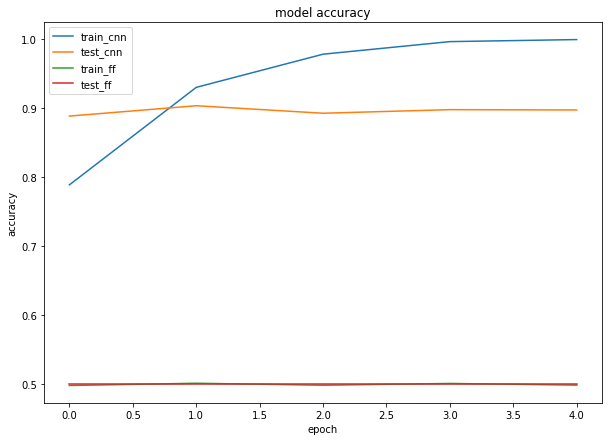

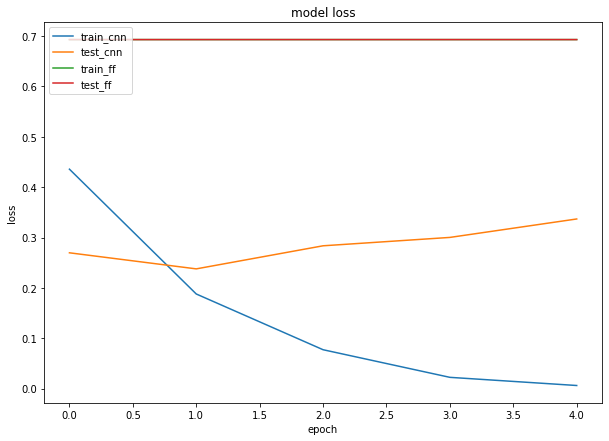

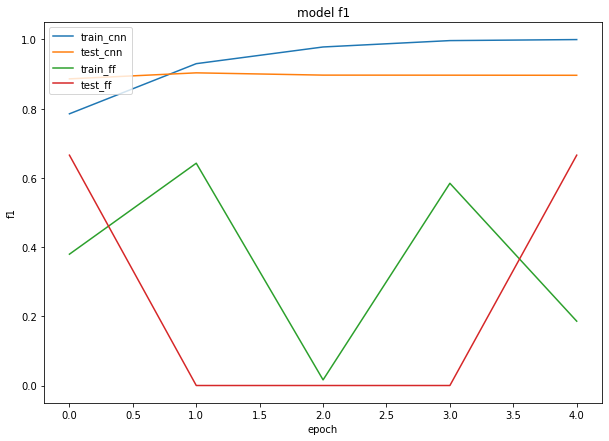

In [0]:
plt.figure(figsize=(10,7))
plt.plot(hist_cnn.history['accuracy'])
plt.plot(hist_cnn.history['val_accuracy'])
plt.plot(hist_ff.history['accuracy'])
plt.plot(hist_ff.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_cnn', 'test_cnn','train_ff', 'test_ff'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(hist_cnn.history['loss'])
plt.plot(hist_cnn.history['val_loss'])
plt.plot(hist_ff.history['loss'])
plt.plot(hist_ff.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_cnn', 'test_cnn','train_ff', 'test_ff'], loc='upper left')
plt.show()
# summarize history for fscore
plt.figure(figsize=(10,7))
plt.plot(hist_cnn.history['f1_m'])
plt.plot(hist_cnn.history['val_f1_m'])
plt.plot(hist_ff.history['f1_m'])
plt.plot(hist_ff.history['val_f1_m'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train_cnn', 'test_cnn','train_ff', 'test_ff'], loc='upper left')
plt.show()

# Dataset 3 Sintético

In [0]:
#install timesynth 
!pip install timesynth
import timesynth as ts
from keras.preprocessing.sequence import TimeseriesGenerator

     |████████████████████████████████| 11.2MB 7.3MB/s 
     |████████████████████████████████| 143kB 50.6MB/s 
  Created wheel for jitcdde: filename=jitcdde-1.4.0-cp36-none-any.whl size=30647 sha256=fc2c71f2f8c65e4c29163076f55adf6c6f1fd5fff18c4c0379bbda075fb15c19
  Stored in directory: /root/.cache/pip/wheels/2c/14/0b/e7afe0b0f1dfd5327ad49307b98670c38a7df3bc4872d69178
  Created wheel for jitcxde-common: filename=jitcxde_common-1.4.1-cp36-none-any.whl size=14934 sha256=a97e2108303ad0fca3be2dea94ef4a1e4d7ce0ec0bc94e93025199b0213f50e3
  Stored in directory: /root/.cache/pip/wheels/10/cd/50/f17ec174e477f7be77d38256b1ef5ca4e1da53dcdb85732817
Successfully built jitcdde jitcxde-common


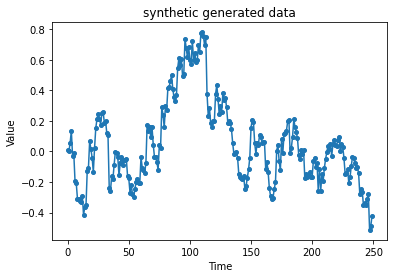

In [0]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)
car = ts.signals.CAR(ar_param=0.5, sigma=0.4)
#continous auto regresive process
car_series = ts.TimeSeries(signal_generator=car)
samples_corr = car_series.sample(irregular_time_samples)[0]
plt.plot(samples_corr, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('synthetic generated data');

In [0]:
#separate data in train and test
l = int(samples_corr.shape[0]*0.6)
x_train = samples_corr[:l]
x_test = samples_corr[l:]
#Procesamiento de data
generador_train = TimeseriesGenerator(x_train, x_train,length=12, shuffle=False, sampling_rate=1,stride=1, batch_size=x_train.shape[0])
generador_test = TimeseriesGenerator(x_test, x_test,length=12, shuffle=False,sampling_rate=1,stride=1, batch_size=x_test.shape[0])

In [0]:
x_train = generador_train[0][0]
y_train = generador_train[0][1]
x_test = generador_test[0][0]
y_test = generador_test[0][1]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

 ## Red Convolucional

In [0]:
model = Sequential()
model.add(Conv1D(12, kernel_size=2, activation="relu", padding="same", input_shape=(12,1)))
model.add(Conv1D(24, kernel_size=2, activation="relu", padding="same", input_shape=(12,1)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="tanh"))
model.compile(loss="mse", optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
138/138 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.0000e+00
Epoch 2/15
138/138 [==============================] - 0s 130us/step - loss: 0.0651 - accuracy: 0.0000e+00
Epoch 3/15
138/138 [==============================] - 0s 129us/step - loss: 0.0426 - accuracy: 0.0000e+00
Epoch 4/15
138/138 [==============================] - 0s 132us/step - loss: 0.0273 - accuracy: 0.0000e+00
Epoch 5/15
138/138 [==============================] - 0s 131us/step - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 6/15
138/138 [==============================] - 0s 132us/step - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 7/15
138/138 [==============================] - 0s 134us/step - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 8/15
138/138 [==============================] - 0s 138us/step - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 9/15
138/138 [==============================] - 0s 132us/step - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 10/15
138/138 [===========================

In [0]:
y_results = model.evaluate(x_test,y_test)
print('accuracy: ',y_results[1])
print('root mean squared error: ',y_results[0]**0.5)
y_predict_cnn = model.predict(x_test)

88/88 [==============================] - 0s 339us/step
accuracy:  0.0
root mean squared error:  0.08768980897578586


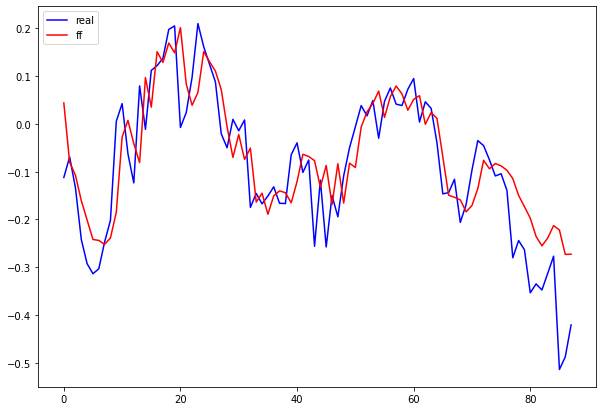

In [0]:
plt.figure(figsize=(10,7))
plt.plot(y_test,'b', y_predict_cnn, 'r',)
plt.legend(['real','cnn'], loc='upper left')
plt.show()

## Feed Forward

In [0]:
model_ff = Sequential()
model_ff.add(Flatten())
model_ff.add(Dense(8, activation="relu"))
model_ff.add(Dense(1, activation="tanh"))
model_ff.compile(loss="mse", optimizer='adam',metrics=['accuracy'])
model_ff.fit(x_train, y_train, epochs=15)

Epoch 1/15
138/138 [==============================] - 0s 524us/step - loss: 0.4551 - accuracy: 0.0000e+00
Epoch 2/15
138/138 [==============================] - 0s 106us/step - loss: 0.4290 - accuracy: 0.0000e+00
Epoch 3/15
138/138 [==============================] - 0s 102us/step - loss: 0.4033 - accuracy: 0.0000e+00
Epoch 4/15
138/138 [==============================] - 0s 103us/step - loss: 0.3752 - accuracy: 0.0000e+00
Epoch 5/15
138/138 [==============================] - 0s 98us/step - loss: 0.3490 - accuracy: 0.0000e+00
Epoch 6/15
138/138 [==============================] - 0s 96us/step - loss: 0.3203 - accuracy: 0.0000e+00
Epoch 7/15
138/138 [==============================] - 0s 98us/step - loss: 0.2945 - accuracy: 0.0000e+00
Epoch 8/15
138/138 [==============================] - 0s 105us/step - loss: 0.2679 - accuracy: 0.0000e+00
Epoch 9/15
138/138 [==============================] - 0s 108us/step - loss: 0.2412 - accuracy: 0.0000e+00
Epoch 10/15
138/138 [============================

In [0]:
y_results_ff = model_ff.evaluate(x_test,y_test)
print('accuracy: ',y_results_ff[1])
print('root mean squared error: ',y_results_ff[0]**0.5)
y_predict_ff = model_ff.predict(x_test)

88/88 [==============================] - 0s 250us/step
accuracy:  0.0
root mean squared error:  0.28061934770328


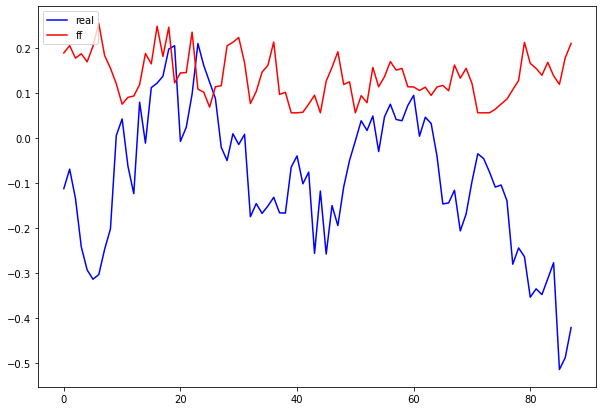

In [0]:
plt.figure(figsize=(10,7))
plt.plot(y_test,'b', y_predict_ff, 'r',)
plt.legend(['real','ff'], loc='upper left')
plt.show()

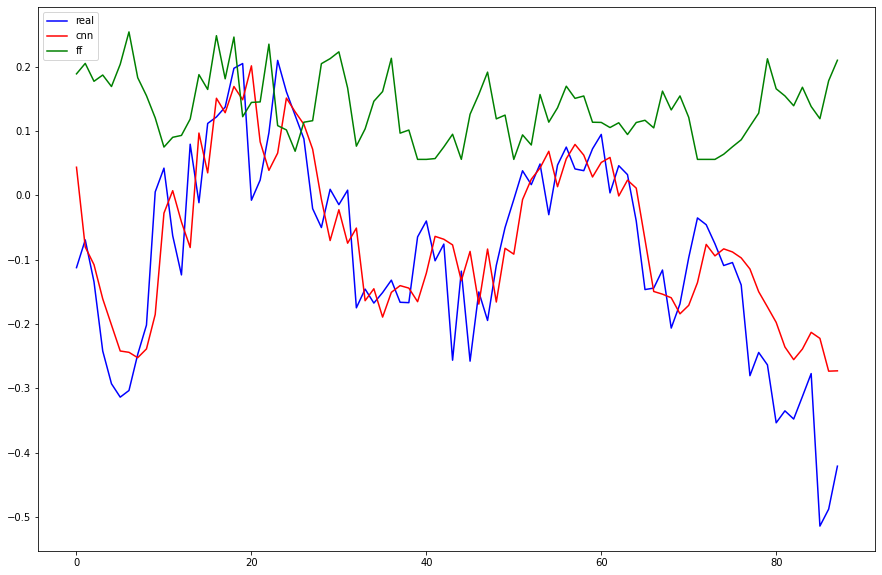

In [0]:
plt.figure(figsize=(15,10))
plt.plot(y_test,'b', y_predict_cnn, 'r', y_predict_ff, 'g',)
plt.legend(['real','cnn','ff'], loc='upper left')
plt.show()

# 2. Challenge Kaggle

Pendiente

In [0]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "./taller1ann-usm.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip1: 
    # printing all the contents of the zip file 
    zip1.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip1.extractall() 
    print('Done!')

Se truncaron las últimas líneas 5000 del resultado de transmisión.
train_images/train_4793.jpg                    2020-04-30 05:51:20         5475
train_images/train_4794.jpg                    2020-04-30 05:51:20         8147
train_images/train_4795.jpg                    2020-04-30 05:51:20         9220
train_images/train_4796.jpg                    2020-04-30 05:51:20         8269
train_images/train_4797.jpg                    2020-04-30 05:51:20         4965
train_images/train_4798.jpg                    2020-04-30 05:51:20         4889
train_images/train_4799.jpg                    2020-04-30 05:51:20         9952
train_images/train_48.jpg                      2020-04-30 05:51:20         6558
train_images/train_480.jpg                     2020-04-30 05:51:20         6447
train_images/train_4800.jpg                    2020-04-30 05:51:20        32119
train_images/train_4801.jpg                    2020-04-30 05:51:20         7151
train_images/train_4802.jpg                    2020-0

In [0]:
train_labels = pd.read_csv('./train_labels.csv')
train_labels

,Id,Expected
0,train_0,vault
1,train_1,flying_buttress
2,train_2,stained_glass
3,train_3,vault
4,train_4,vault
...,...,...
9207,train_9207,gargoyle
9208,train_9208,dome_outer
9209,train_9209,column
9210,train_9210,vault


In [0]:
def load_image(name,path):
    # load the image
    image = Image.open(f'{path}/{name}')
    #image = image.resize((224, 224), Image.ANTIALIAS)
    data = np.asarray(image)
    image.close()
    return data

#image = image.resize((299, 299), Image.ANTIALIAS)

In [0]:
train_path = './train_images'
train_files = [load_image(f+'.jpg',train_path) for f in train_labels['Id'].values]

In [0]:
for i, x in enumerate(train_files):
    if x.shape != (128,128,3):
        print(x,i)
        train_labels.drop(train_labels.index[i],inplace=True)
        del train_files[i]
train_labels.reset_index(inplace=True,drop=True)

[[152 110  48 ...  15  19   3]
 [146 116  51 ...  12  12   2]
 [154 130  54 ...  18  13   9]
 ...
 [  1   3   7 ...  12  28  40]
 [ 11   8   4 ...  13  29  42]
 [ 21  20  34 ...  12  28  42]] 8006


In [0]:
train_labels.iloc[8000:8010]

,Id,Expected
8000,train_8000,column
8001,train_8001,gargoyle
8002,train_8002,altar
8003,train_8003,flying_buttress
8004,train_8004,column
8005,train_8005,altar
8006,train_8007,vault
8007,train_8008,altar
8008,train_8009,apse
8009,train_8010,altar


In [0]:
categorias = train_labels['Expected'].value_counts().to_dict()
for i,k in enumerate(categorias.keys()):
    categorias[k]=i
categorias

{'altar': 6,
 'apse': 8,
 'bell_tower': 4,
 'column': 0,
 'dome_inner': 7,
 'dome_outer': 2,
 'flying_buttress': 9,
 'gargoyle': 1,
 'stained_glass': 5,
 'vault': 3}

In [0]:
train_labels['Expected'] = train_labels['Expected'].map(categorias)
train_labels.head(5)

,Id,Expected
0,train_0,3
1,train_1,9
2,train_2,5
3,train_3,3
4,train_4,3


In [0]:
train_labels['Expected'].value_counts()

0    1716
1    1411
2    1055
3     993
4     965
5     911
6     760
7     568
8     469
9     363
Name: Expected, dtype: int64

In [0]:
# 9 -> rotar, rotar+intensidad, rotar+ zoom max(1400)

In [0]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import itertools
# load the image

def rotar(data,n):
  samples = expand_dims(data, 0)
  datagen = ImageDataGenerator(rotation_range=65)
  datagen2 = ImageDataGenerator(brightness_range=[2.0,0.5])
  datagen3 = ImageDataGenerator(zoom_range=[0.5,1.0])

  it = datagen.flow(samples, batch_size=1)
  arreglo = []
  for i in range(n):
    # define subplot
    #plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    if i==0:
      it2 = datagen2.flow(expand_dims(image,0), batch_size=1)
      batch = it2.next()
      image = batch[0].astype('uint8')

    '''elif i==1:
      it3 = datagen3.flow(expand_dims(image, 0), batch_size=1)
      batch = it3.next()
      image = batch[0].astype('uint8')
    '''
    # plot raw pixel data
    arreglo.append(image)
    #plt.imshow(image)
  # show the figure
  #plt.show()
  return arreglo

list_9 = train_labels[train_labels['Expected']==9].index
new_images_9 = [rotar(train_files[i],1) for i in list_9]
new_images_9 = list(itertools.chain(*new_images_9))

list_8 = train_labels[train_labels['Expected']==8].index
new_images_8 = [rotar(train_files[i],1) for i in list_8]
new_images_8 = list(itertools.chain(*new_images_8))

list_7 = train_labels[train_labels['Expected']==7].index
new_images_7 = [rotar(train_files[i],1) for i in list_7]
new_images_7 = list(itertools.chain(*new_images_7))

In [0]:
size_9 = len(new_images_9)
size_8 = len(new_images_8)
size_7 = len(new_images_7)


train_files=train_files+new_images_9+new_images_8+new_images_7
del new_images_9
del new_images_8
del new_images_7

In [0]:
train_labels['Expected'].values

array([3, 9, 4, ..., 4, 3, 0])

In [0]:
x_train = np.stack(train_files)
del train_files
y_train = train_labels['Expected'].values
y_train = np.concatenate((y_train,np.full((1,size_9),9)[0]))
y_train = np.concatenate((y_train,np.full((1,size_8),8)[0]))
y_train = np.concatenate((y_train,np.full((1,size_7),7)[0]))

y_train = to_categorical(y_train)
del train_labels

In [0]:
x_train = x_train/255



```
# Esto tiene formato de código
```

## Red

In [0]:
from keras.layers.normalization import BatchNormalization

#Get back the convolutional part of a VGG network trained on ImageNet
from keras.applications import VGG16

model_conv = VGG16(weights='imagenet', include_top=False)
model_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
for layer in model_conv.layers: 
  layer.trainable=False
#Create your own input format (here 3x200x200)
input = Input(shape=(128,128, 3),name = 'image_input')

#Use the generated model 
output_conv = model_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_conv)
x = Dense(4096, activation='relu', name='fc1')(x) #was4096
x = BatchNormalization()(x)
x = Dropout(.5)(x)
x = Dense(4096, activation='relu', name='fc2')(x) #was4096
x = BatchNormalization()(x)
x = Dropout(.5)(x)
x = Dense(10, activation='softmax', name='predictions')(x)

In [0]:
my_model = Model(input=input, output=x)
my_model.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 128, 128, 3)       0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              33558528  
_________________________________________________________________
batch_normalization_25 (Batc (None, 4096)              16384     
_________________________________________________________________
dropout_25 (Dropout)         (None, 4096)              0         
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              167

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  """Entry point for launching an IPython kernel.


In [0]:
my_model = Model(input=input, output=x)

epochs = 9

my_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=.0001), metrics=['accuracy',f1_m,precision_m, recall_m])

batch_size= 256
'''
my_model.fit_generator(datagen.flow(x_t1, y_t1, batch_size=batch_size), 
                       validation_data=datagen.flow(x_t2, y_t2, batch_size=batch_size), 
                       validation_steps=len(x_t2)/20,
                       steps_per_epoch=len(x_t1)/20, 
                       epochs=epochs)
'''
my_model.fit(x_train, y_train, 
           batch_size=256, epochs=epochs)
my_model.save_weights('my_model_weights.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  """Entry point for launching an IPython kernel.


Epoch 1/9
11971/11971 [==============================] - 13s 1ms/step - loss: 0.7212 - accuracy: 0.7958 - f1_m: 0.7976 - precision_m: 0.8238 - recall_m: 0.7760
Epoch 2/9
11971/11971 [==============================] - 12s 986us/step - loss: 0.2576 - accuracy: 0.9186 - f1_m: 0.9190 - precision_m: 0.9292 - recall_m: 0.9090
Epoch 3/9
11971/11971 [==============================] - 12s 988us/step - loss: 0.1564 - accuracy: 0.9475 - f1_m: 0.9474 - precision_m: 0.9542 - recall_m: 0.9408
Epoch 4/9
11971/11971 [==============================] - 12s 987us/step - loss: 0.1161 - accuracy: 0.9584 - f1_m: 0.9587 - precision_m: 0.9630 - recall_m: 0.9544
Epoch 5/9
11971/11971 [==============================] - 12s 984us/step - loss: 0.0822 - accuracy: 0.9713 - f1_m: 0.9707 - precision_m: 0.9737 - recall_m: 0.9678
Epoch 6/9
11971/11971 [==============================] - 12s 983us/step - loss: 0.0620 - accuracy: 0.9781 - f1_m: 0.9781 - precision_m: 0.9802 - recall_m: 0.9761
Epoch 7/9
11971/11971 [=======

In [0]:
##REAL TEST

In [0]:
'''del x_t1
del x_t2
del y_t1
del y_t2
'''
del x_train
del y_train

In [0]:
test_labels = pd.read_csv('./sample_submission.csv')
test_labels

,Id,Expected
0,test_0,prediction
1,test_1,prediction
2,test_2,prediction
3,test_3,prediction
4,test_4,prediction
...,...,...
1018,test_1018,prediction
1019,test_1019,prediction
1020,test_1020,prediction
1021,test_1021,prediction


In [0]:
test_path = './test_images'
test_files = [load_image(f+'.jpg',test_path) for f in test_labels['Id'].values]

In [0]:
test_files = np.stack(test_files)

In [0]:
test_files.shape

(1023, 128, 128, 3)

In [0]:
test_files = test_files/255

In [0]:
predictions = my_model.predict(test_files)

In [0]:
predictions.shape

(1023, 10)

In [0]:
predictions = np.argmax(predictions,axis=1)

In [0]:
categorias_inv = {v: k for k, v in categorias.items()}

In [0]:
categorias_inv

{0: 'column',
 1: 'gargoyle',
 2: 'dome_outer',
 3: 'vault',
 4: 'bell_tower',
 5: 'stained_glass',
 6: 'altar',
 7: 'dome_inner',
 8: 'apse',
 9: 'flying_buttress'}

In [0]:
predictions = np.vectorize(categorias_inv.get)(predictions)

In [0]:
predictions[0]

'dome_outer'

In [0]:
test_labels['Expected'] = predictions

In [0]:
test_labels

,Id,Expected
0,test_0,dome_outer
1,test_1,stained_glass
2,test_2,dome_outer
3,test_3,flying_buttress
4,test_4,altar
...,...,...
1018,test_1018,column
1019,test_1019,altar
1020,test_1020,stained_glass
1021,test_1021,vault


In [0]:
test_labels.to_csv('test_predictions.csv',index=False)